# QuickGuide for Rtings

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install requirements

In [1]:
!pip install -U pandas openpyxl tqdm
!pip install -U requests selenium beautifulsoup4 
!pip install -U wordcloud nltk 
!pip install -U scikit-learn openai 
!pip install -U matplotlib seaborn plotly kaleido
!pip install -U mkt-retv

In [ ]:
from market_research.tools.installer import Installer
Installer.install_chrome_and_driver()

# Data Preparing

## Env. Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from market_research.scraper import Specscraper_s
from market_research.scraper.rtings import Rtings, Rurlsearcher, Rvisualizer
from market_research.tools import FileManager

## Preparing

- Input model list

In [2]:
rurlsearcher = Rurlsearcher()
sony_model_dict = rurlsearcher.get_model_dictionary("sony")

In [ ]:
# scraper_s = Specscraper_s()
# df_models = scraper_s.get_models_info(fastmode=True)

In [4]:
# model_list = sony_model_dict.get("oled")

In [5]:
# model_list = sony_model_dict.get("mini_led")

In [6]:
# model_list = sony_model_dict.get("mini_led")
# model_list.extend(sony_model_dict.get("lcd"))

In [3]:
model_list = sony_model_dict.get("oled")
# model_list.extend(sony_model_dict.get("mini_led"))
# model_list.extend(sony_model_dict.get("lcd"))

---

## Gathering

In [4]:
urls = rurlsearcher.get_urls_web(keywords= model_list)
urls

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [05:15<00:00, 12.12s/it]


['https://www.rtings.com/tv/reviews/sony/a95k-oled',
 'https://www.rtings.com/tv/reviews/sony/a95l-oled',
 'https://www.rtings.com/tv/reviews/sony/a80k-a80ck-oled',
 'https://www.rtings.com/tv/reviews/sony/a90k-oled',
 'https://www.rtings.com/tv/reviews/sony/a80l-a80cl-oled',
 'https://www.rtings.com/tv/reviews/sony/a90j-oled']

In [5]:
rtings = Rtings()
data_dict = rtings.get_data(urls=urls)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:56<00:00, 39.49s/it]


# plot

- seaborn plot color map: https://seaborn.pydata.org/tutorial/color_palettes.html  
- plotly plot color map: https://plotly.com/python/builtin-colorscales/

In [6]:
measurement_df = data_dict.get("measurement")
rvisualizer = Rvisualizer(measurement_df)

## Rtings scores

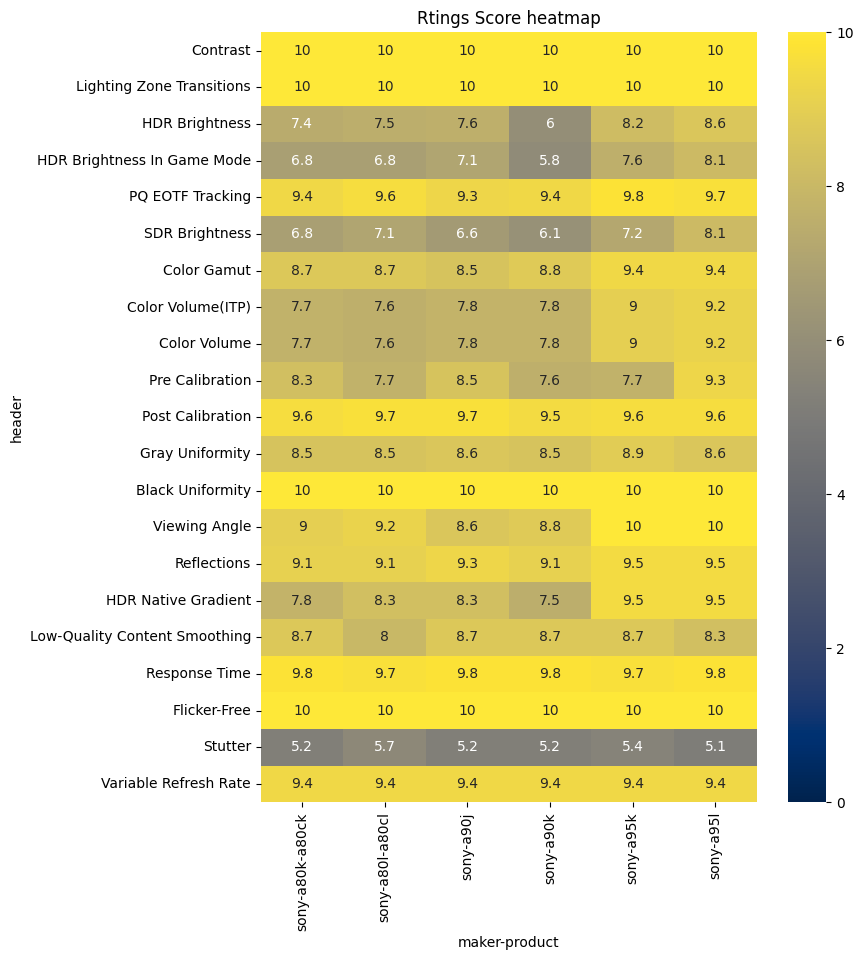

In [7]:
rvisualizer.heatmap_scores()

## PCA: Principal component analysis

- PCA는 데이터 차원 축소를 통해 주요 특징을 추출하고 노이즈를 최소화하는 기술로 특성 선택 등에 활용  
- PCA 주성분은 고유값과 관련된 중요도를 통해 데이터 분산을 나타내며, 높은 loading은 설명력이 큼.

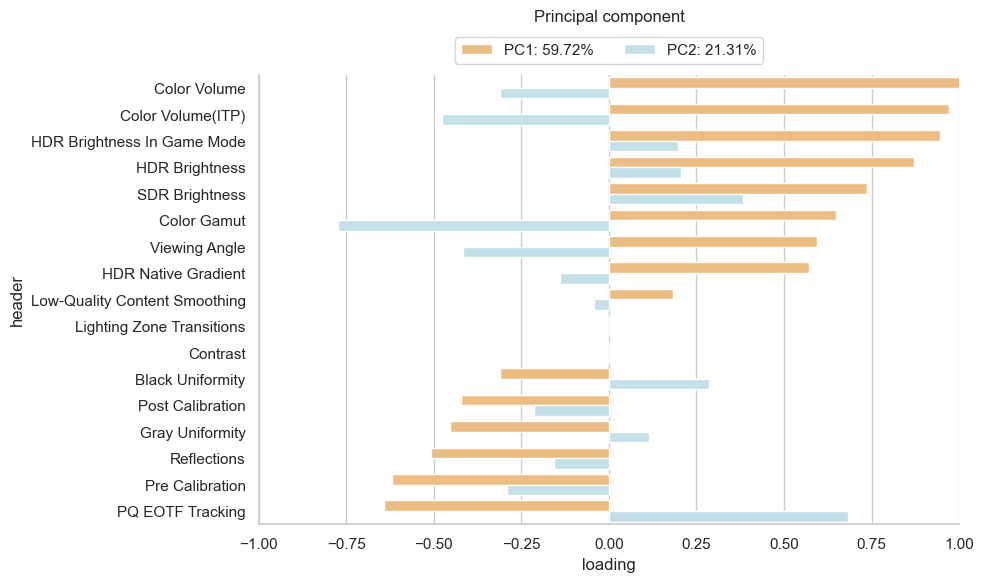

In [8]:
rvisualizer.plot_pca()

## Plot detail

### HDR Brightness

In [9]:
target_col = 'HDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

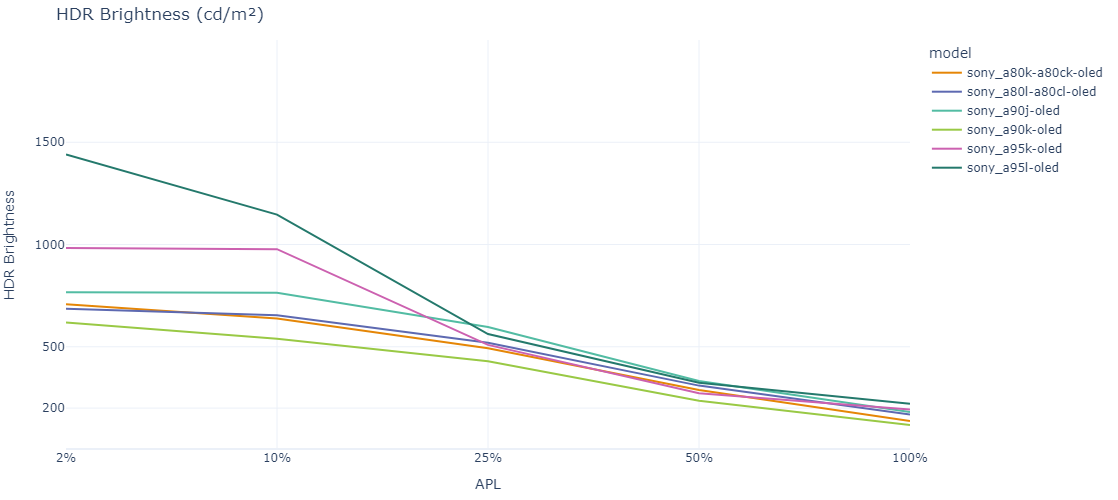

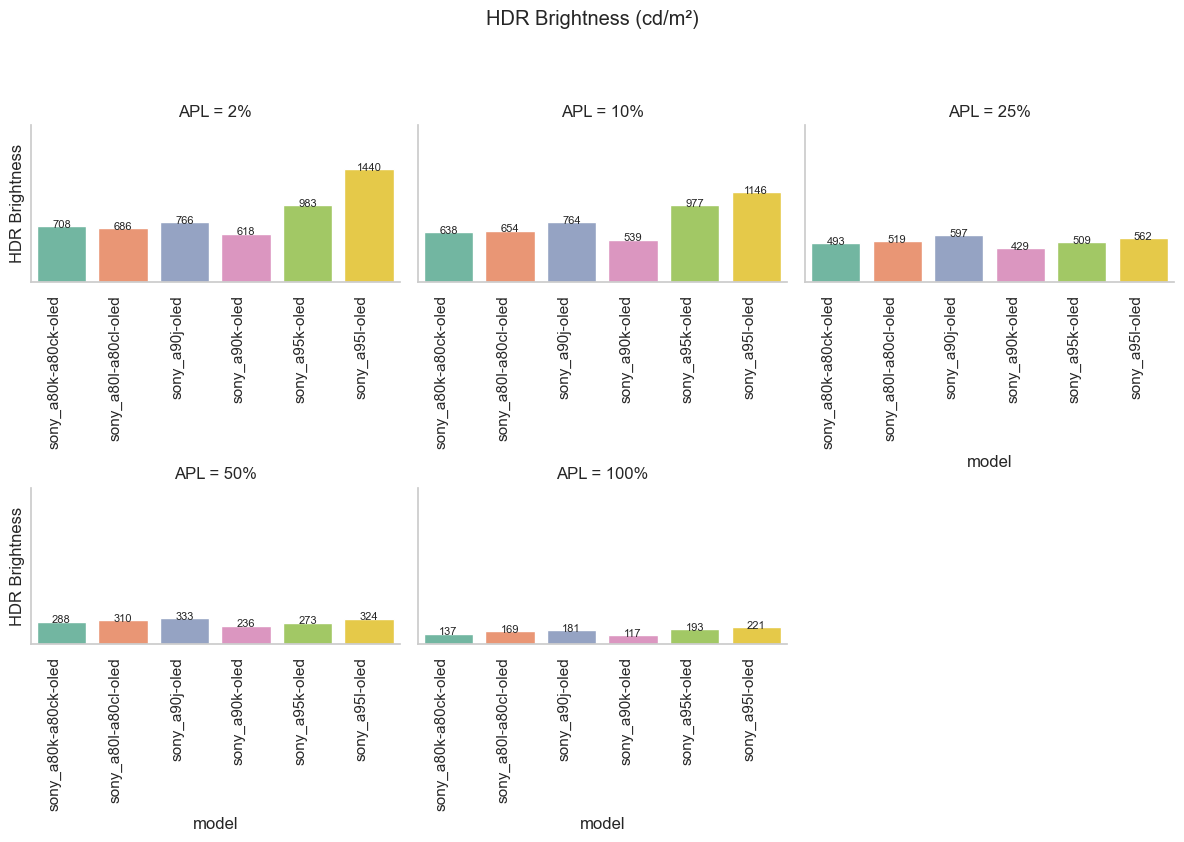

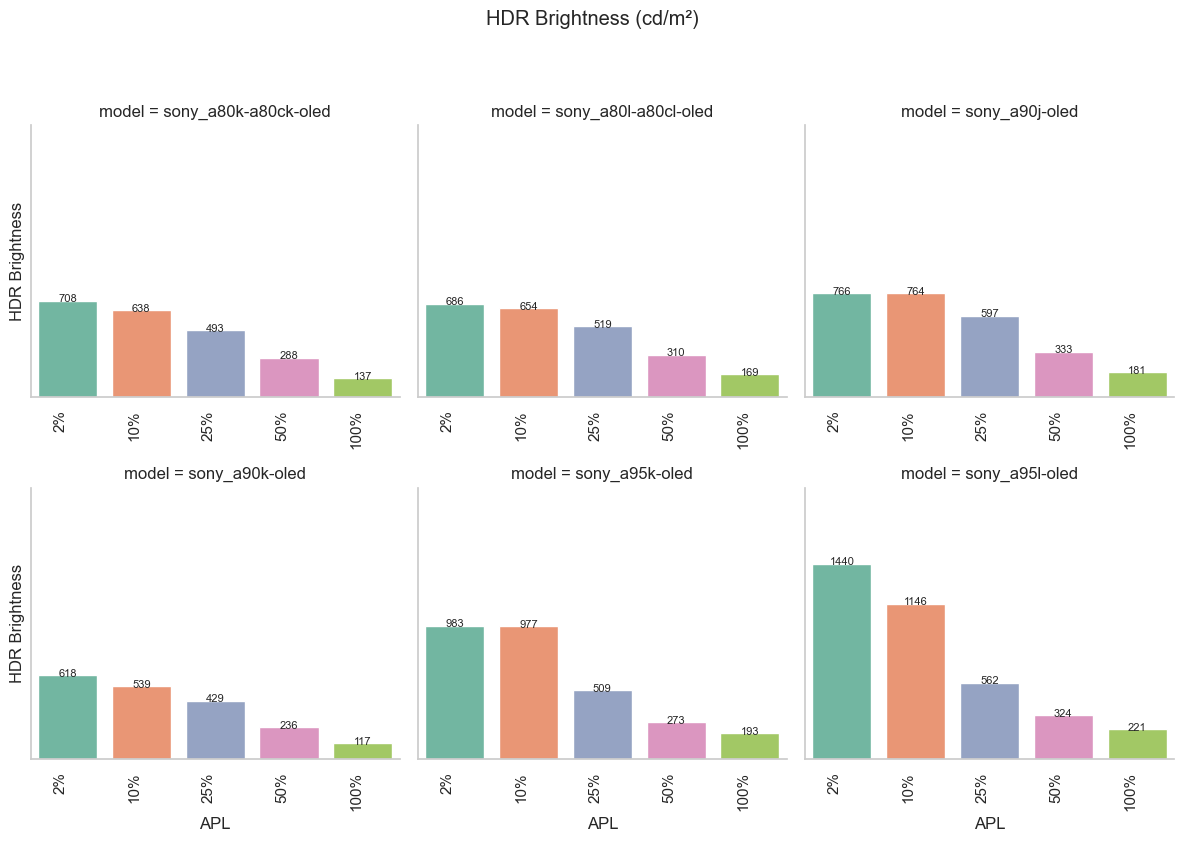

In [10]:
rvisualizer.plot_lines(target_col, yticks=yticks, ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### HDR Brightness In Game Mod

In [11]:
target_col = 'HDR Brightness In Game Mode'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

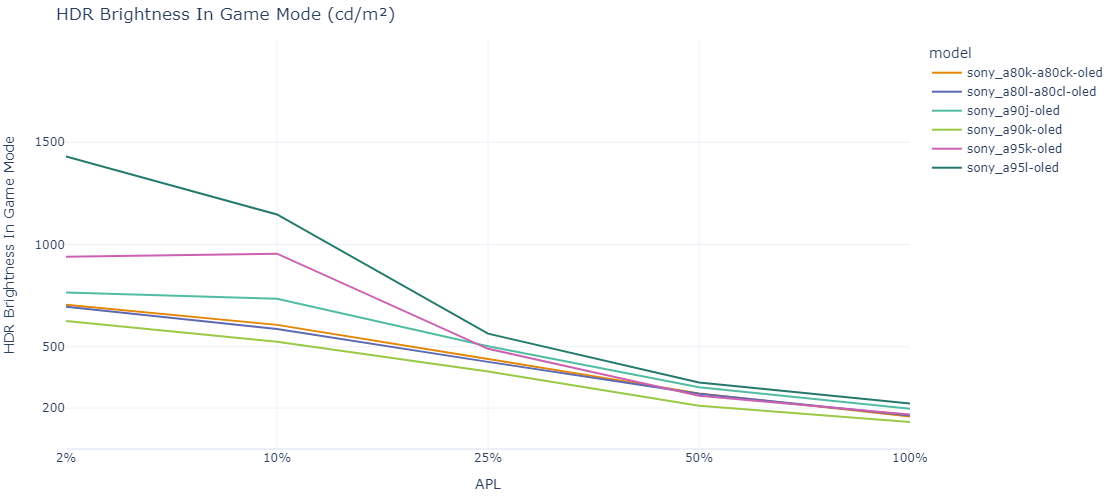

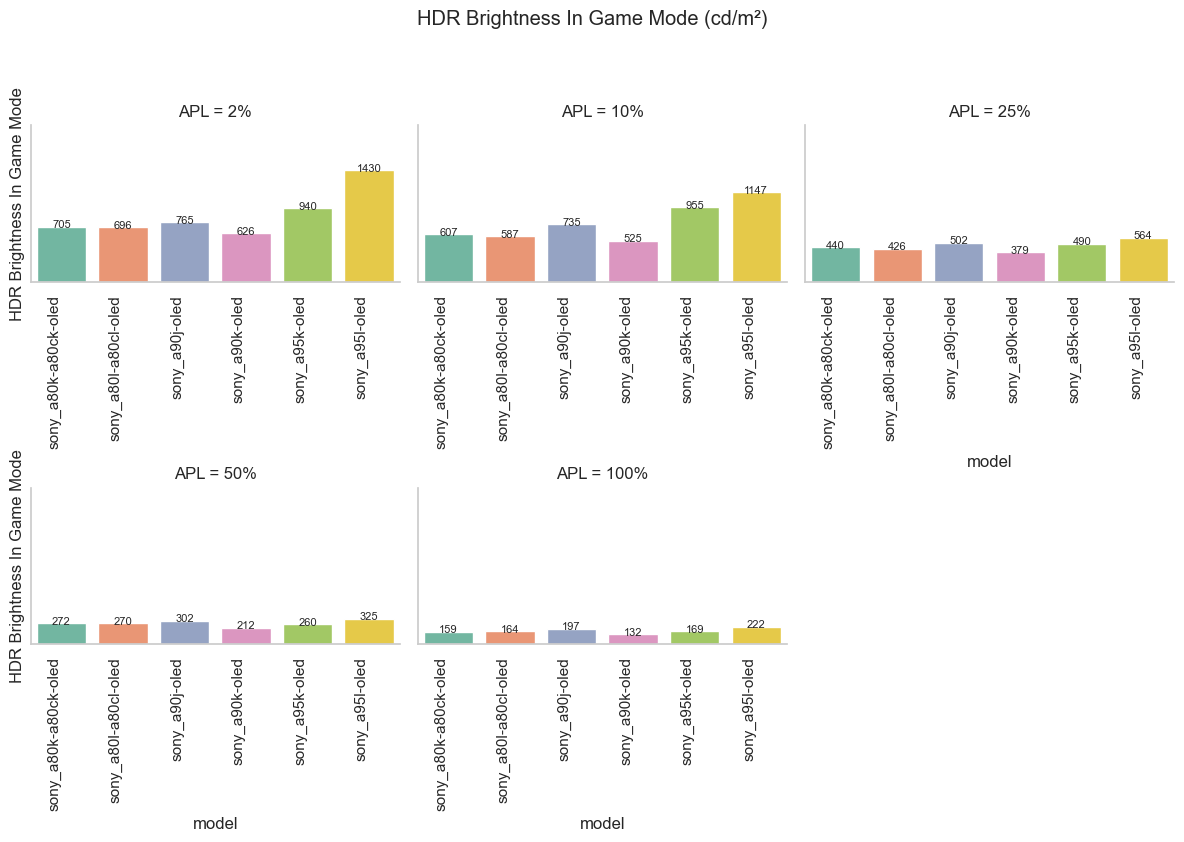

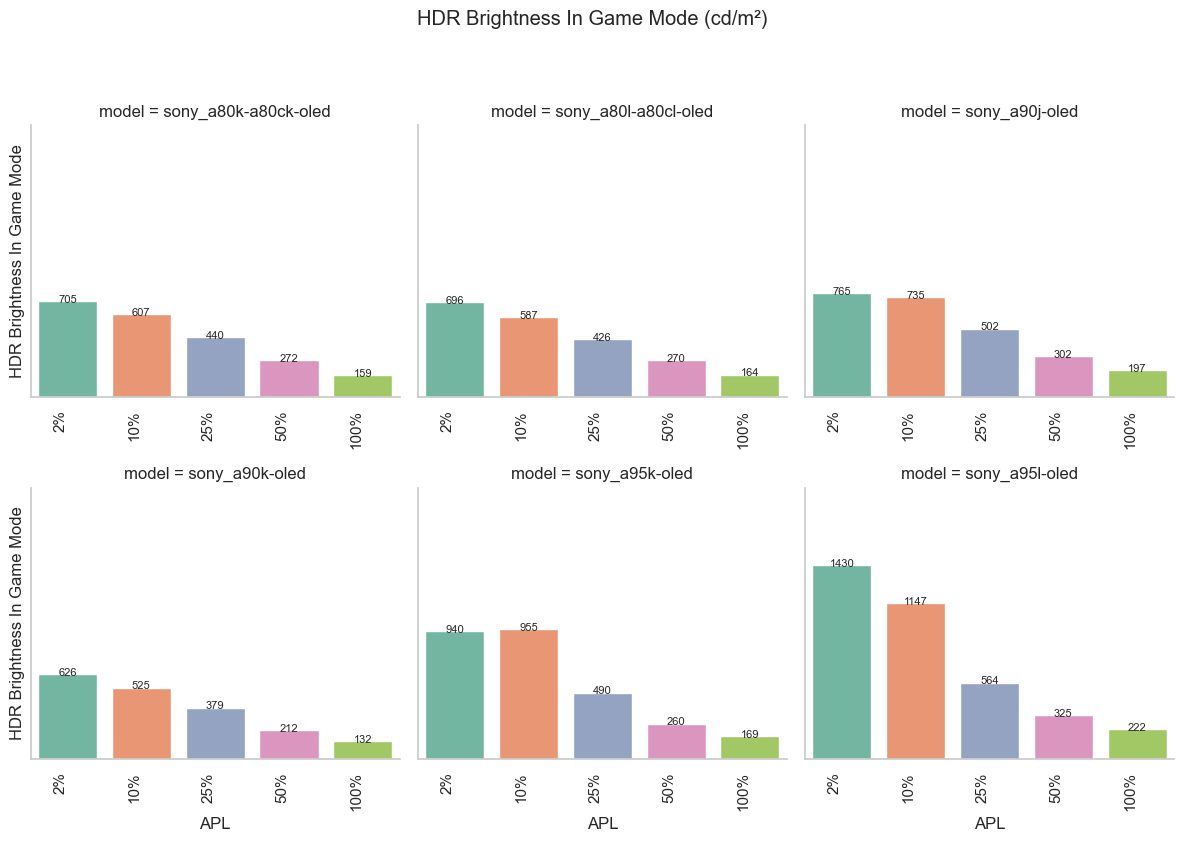

In [12]:
rvisualizer.plot_lines(target_col,yticks=yticks,ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### SDR Brightness

In [13]:
target_col = 'SDR Brightness'
yticks = [200,500,1000,1500]
ylims = (0, 2000)

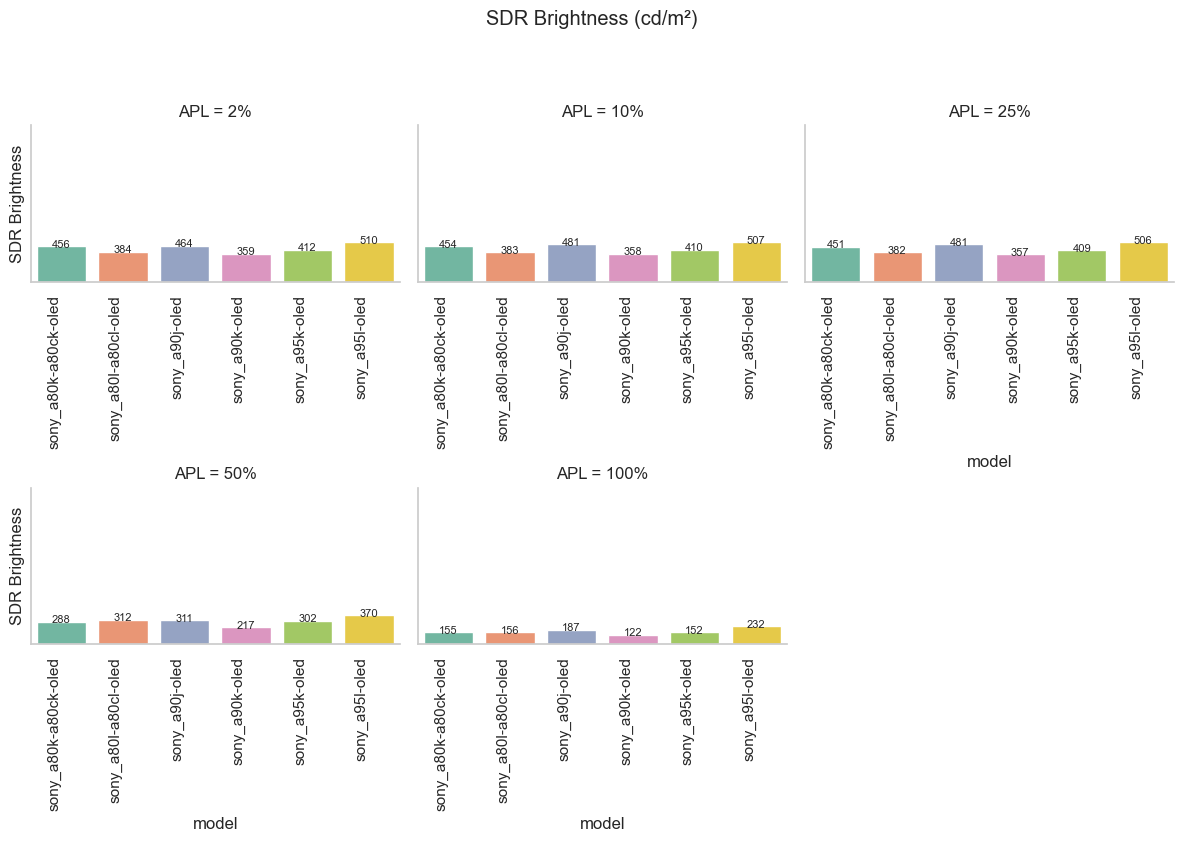

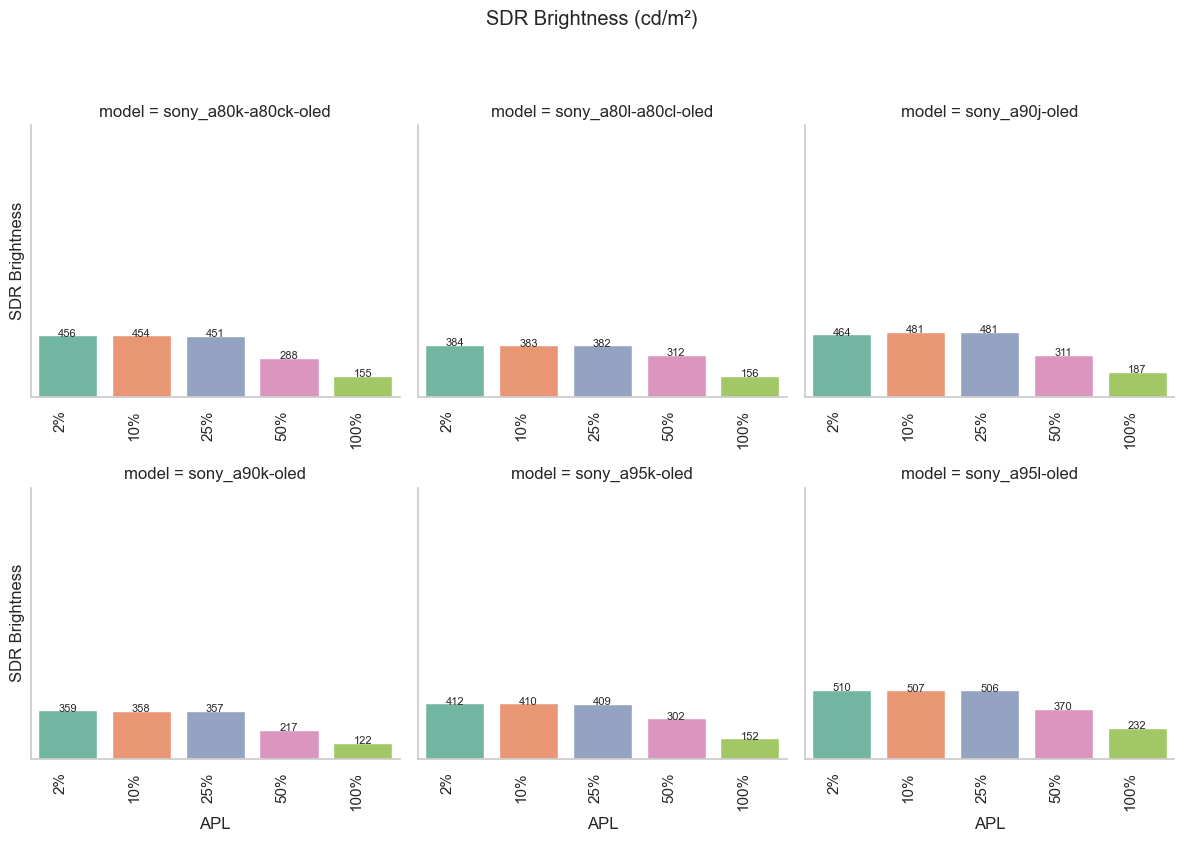

In [14]:
rvisualizer.plot_lines(target_col)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_yticks=yticks, facet_ylims=ylims, swap_mode=True)

### Color Volume

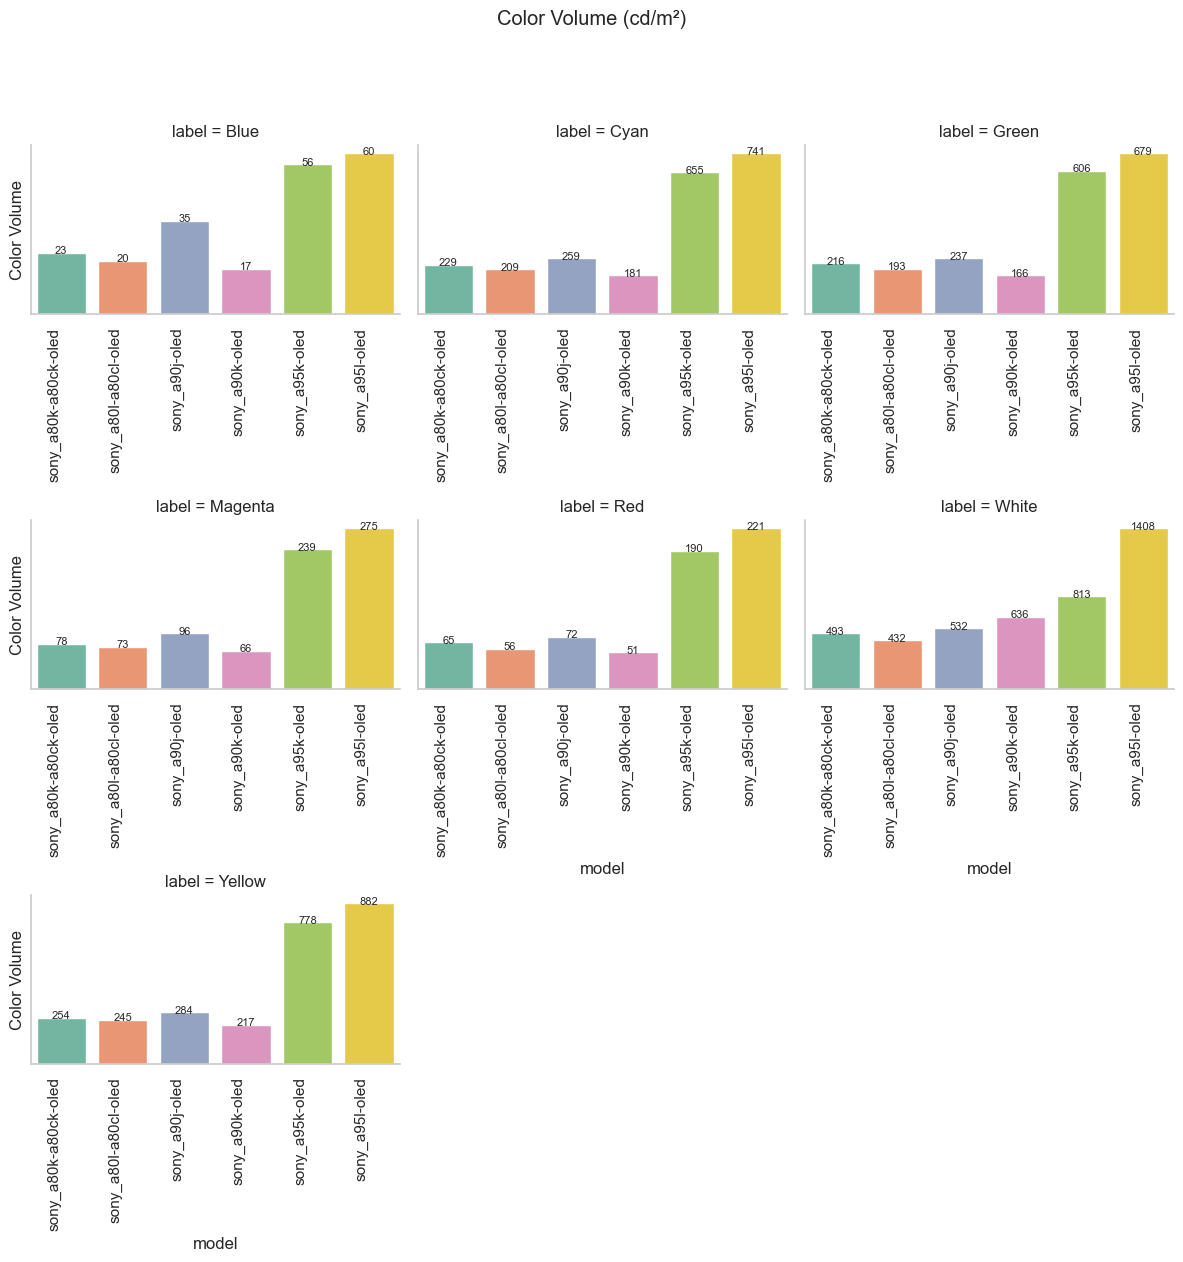

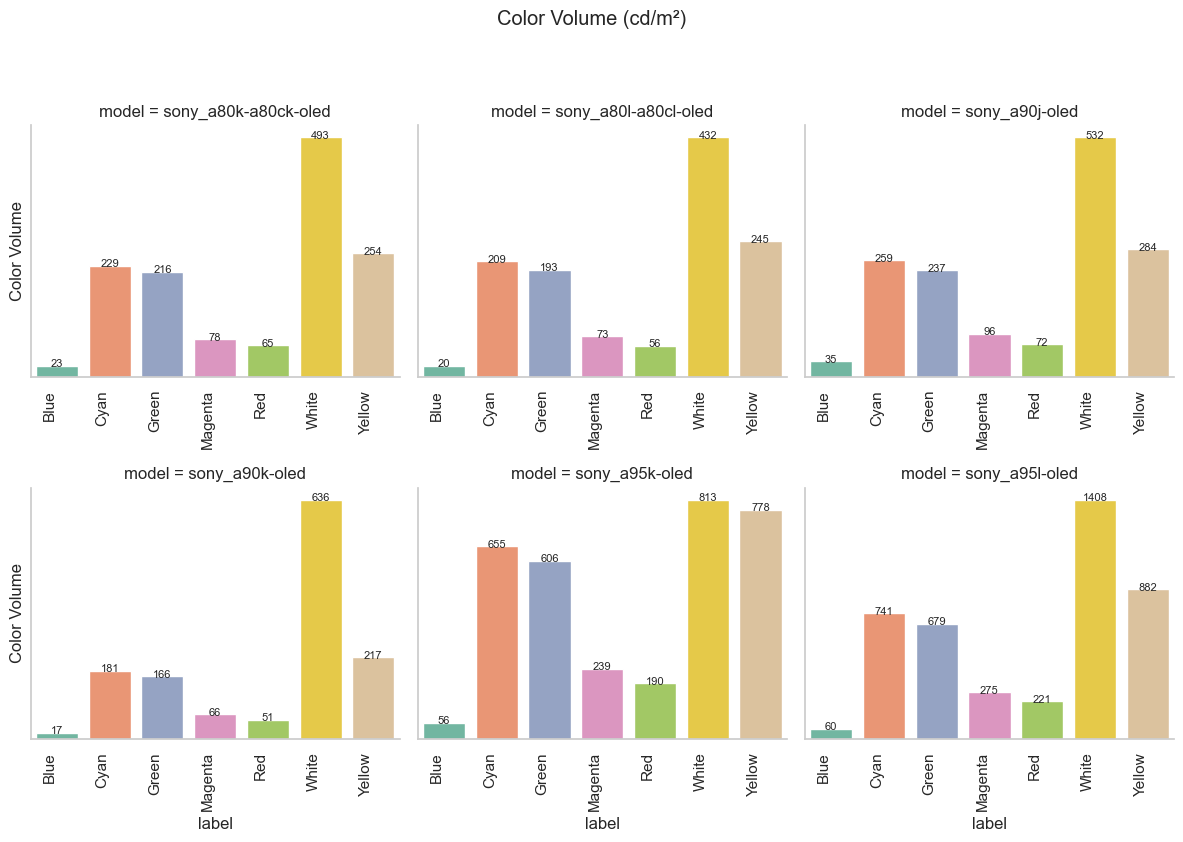

In [15]:
target_col = 'Color Volume'
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

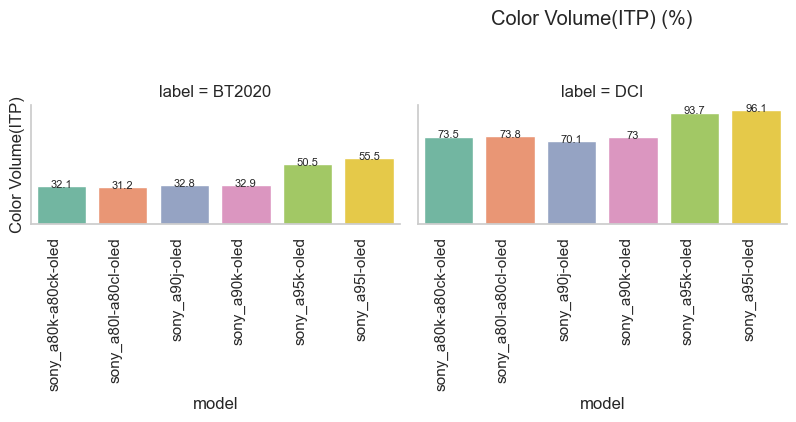

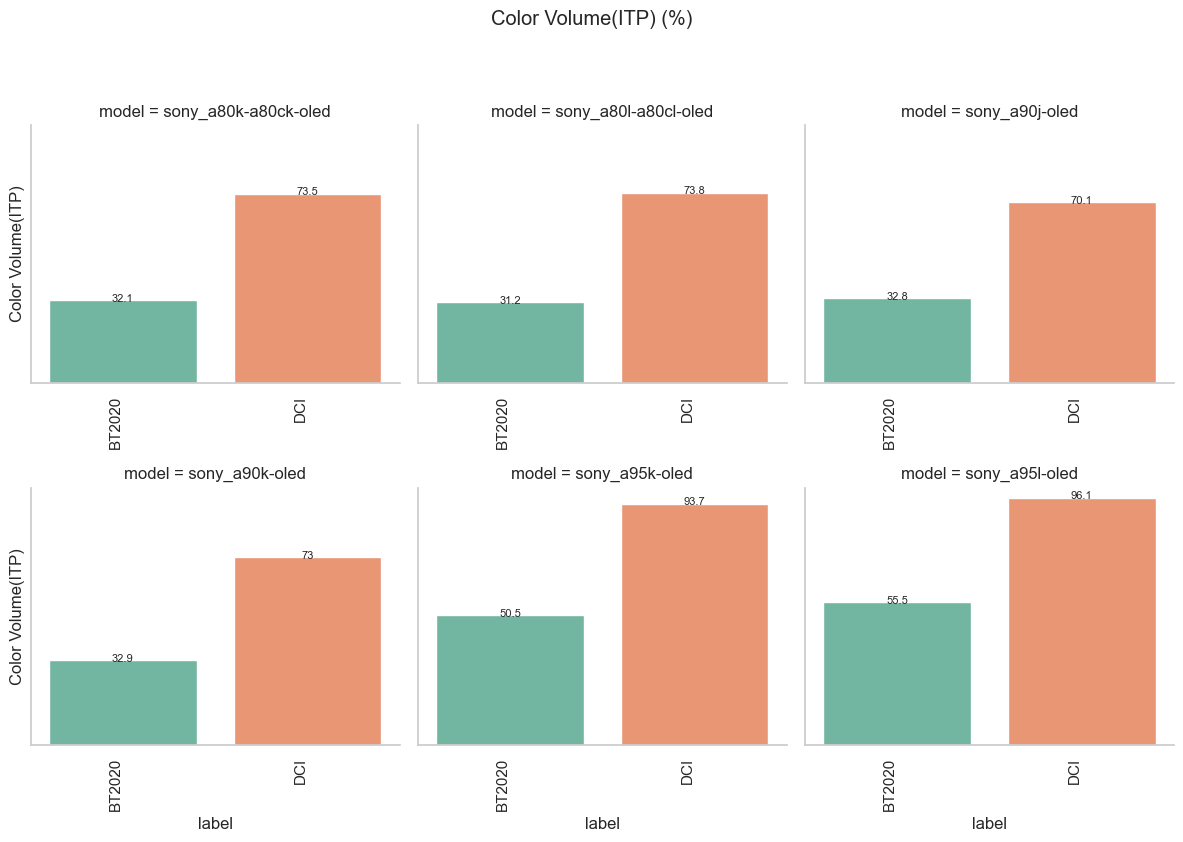

In [16]:
target_col = 'Color Volume(ITP)'
ylims = (0, 100)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Color Gamut

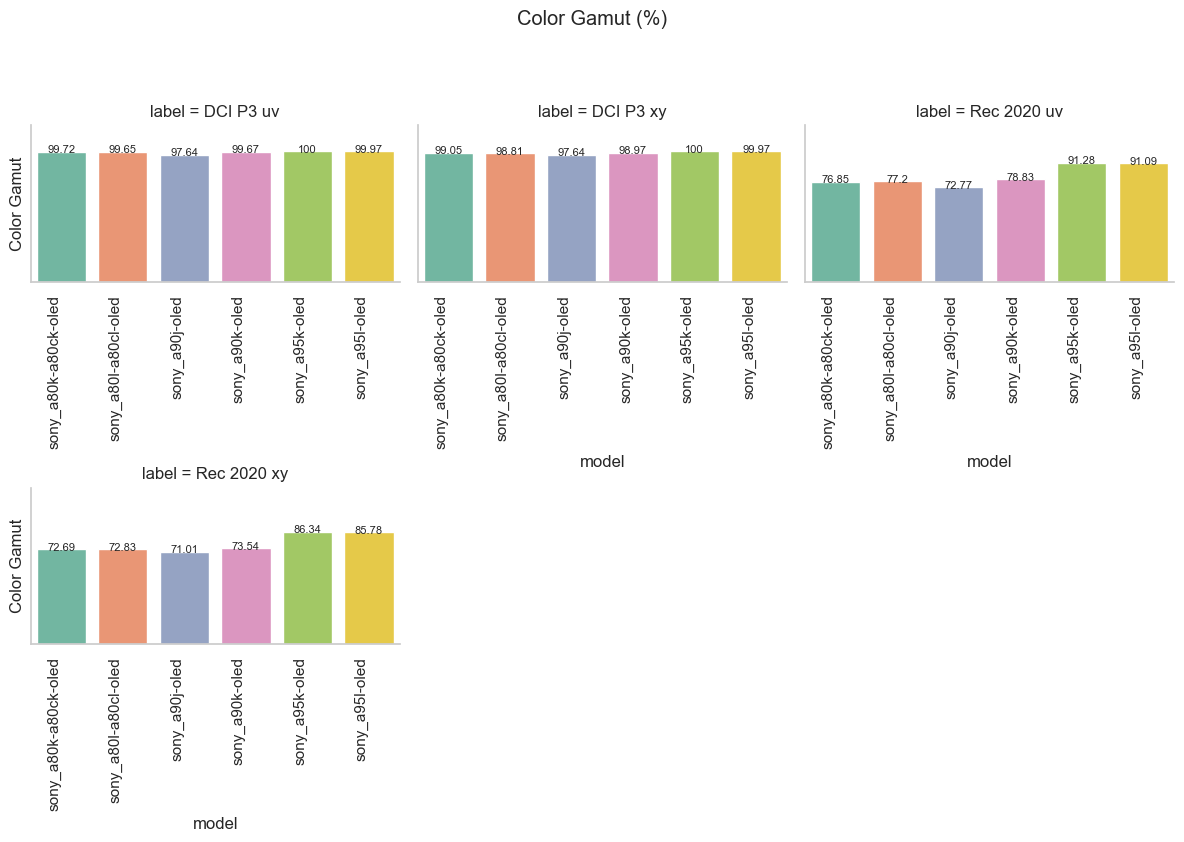

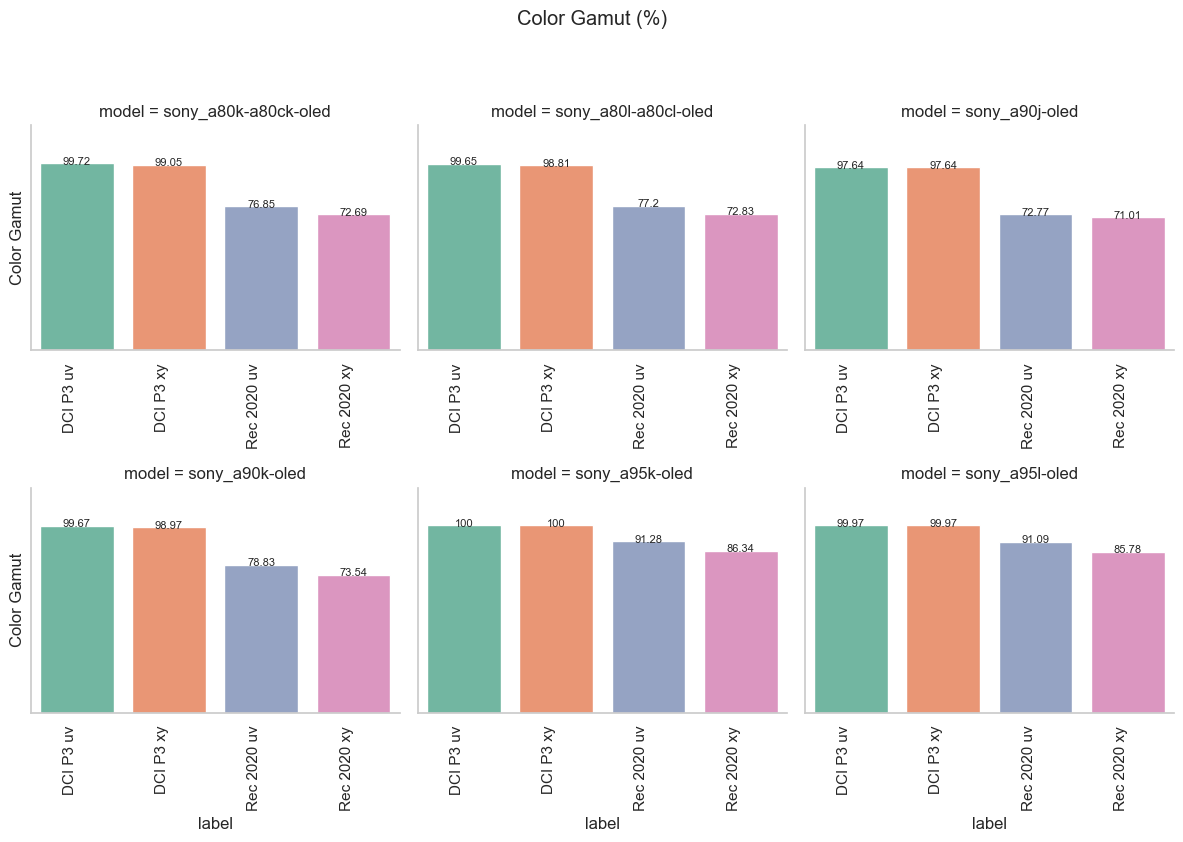

In [17]:
target_col = "Color Gamut"
ylims = (0, 120)
rvisualizer.plotsns_facet_bar(target_col,facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Viewing Angle

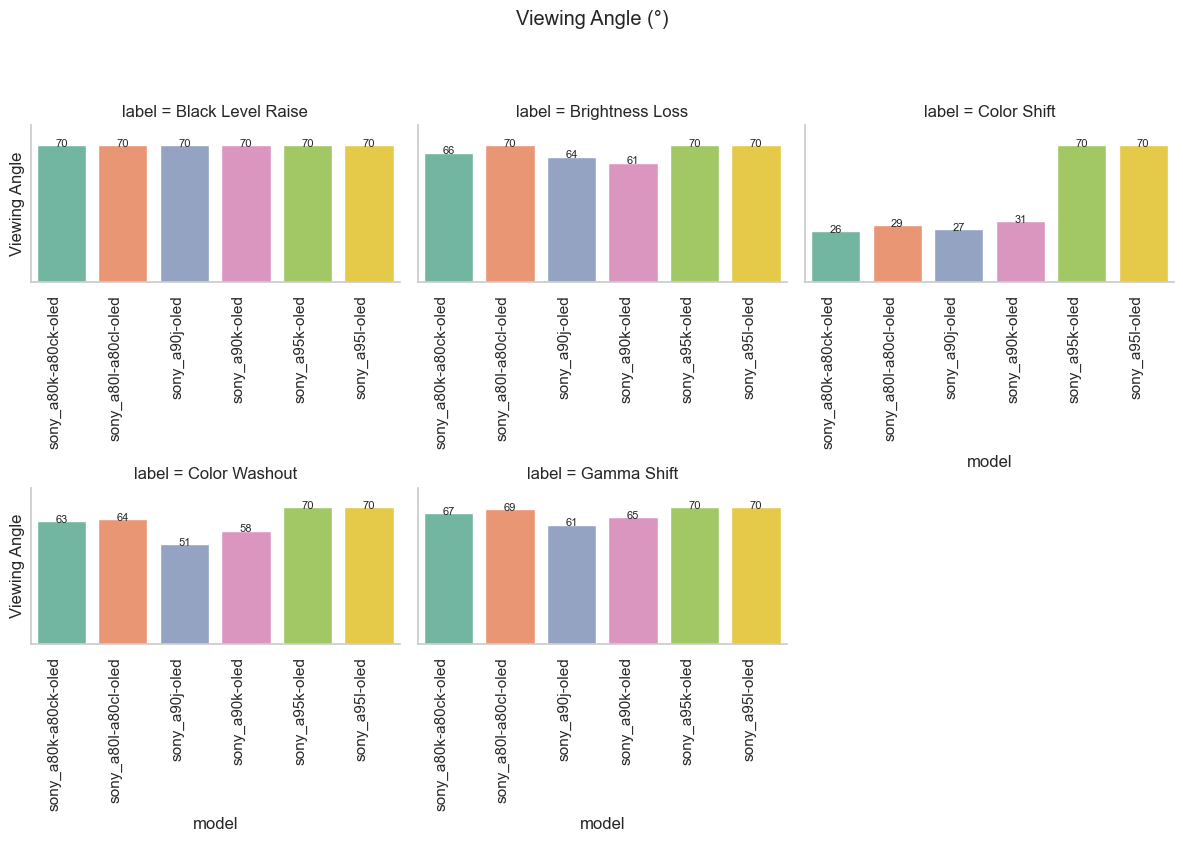

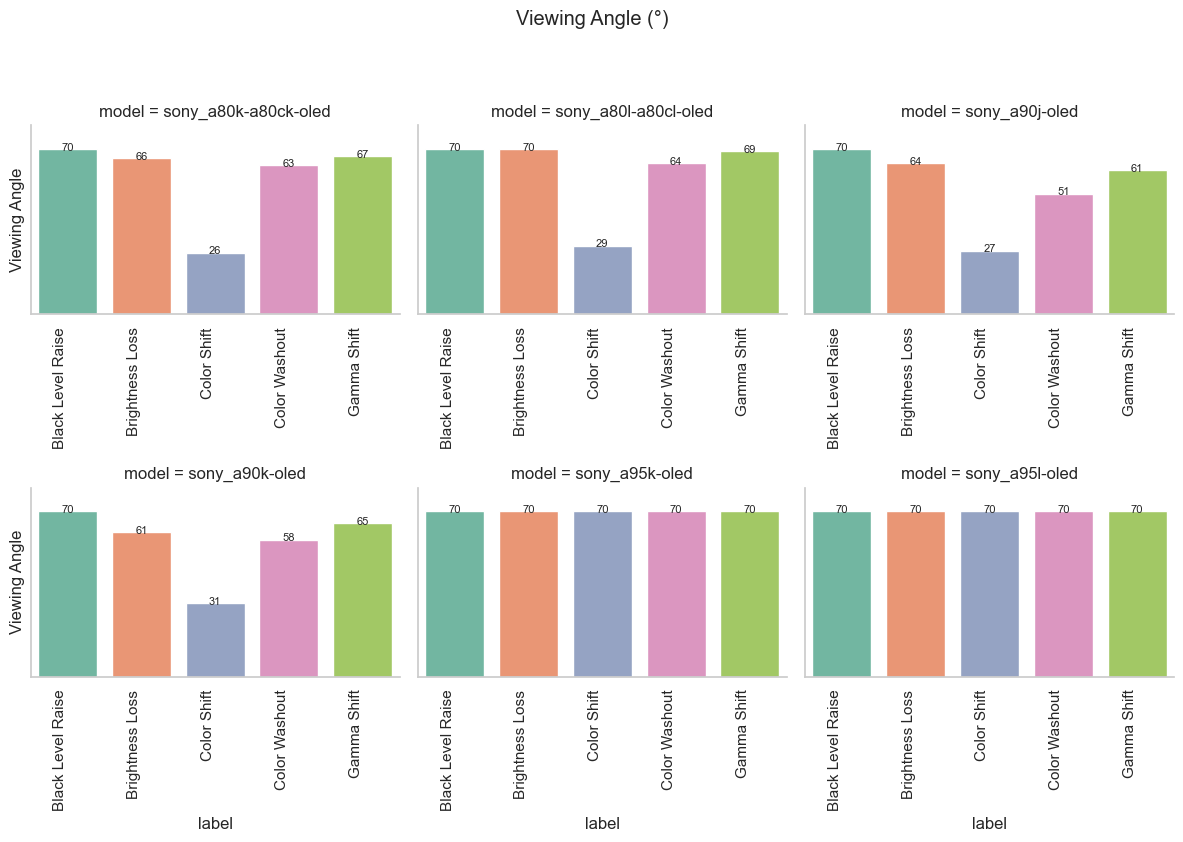

In [18]:
target_col = 'Viewing Angle'
ylims = (0, 80)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims)
rvisualizer.plotsns_facet_bar(target_col, facet_ylims=ylims, swap_mode=True)

### Contrast

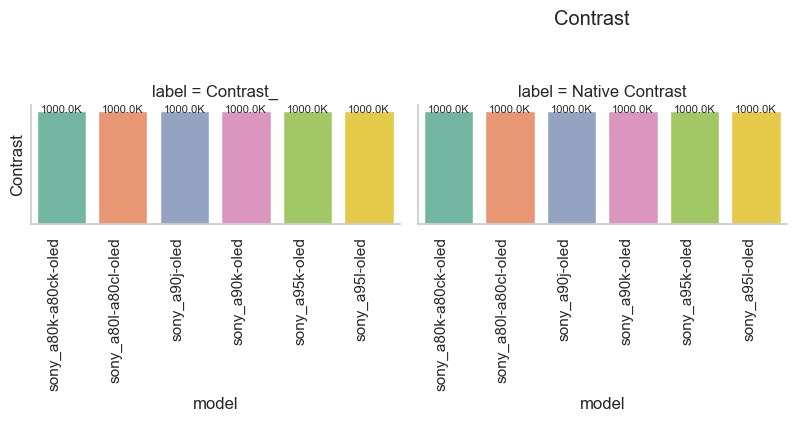

In [19]:
target_col = 'Contrast'
rvisualizer.plotsns_facet_bar(target_col)

### Pre Calibration

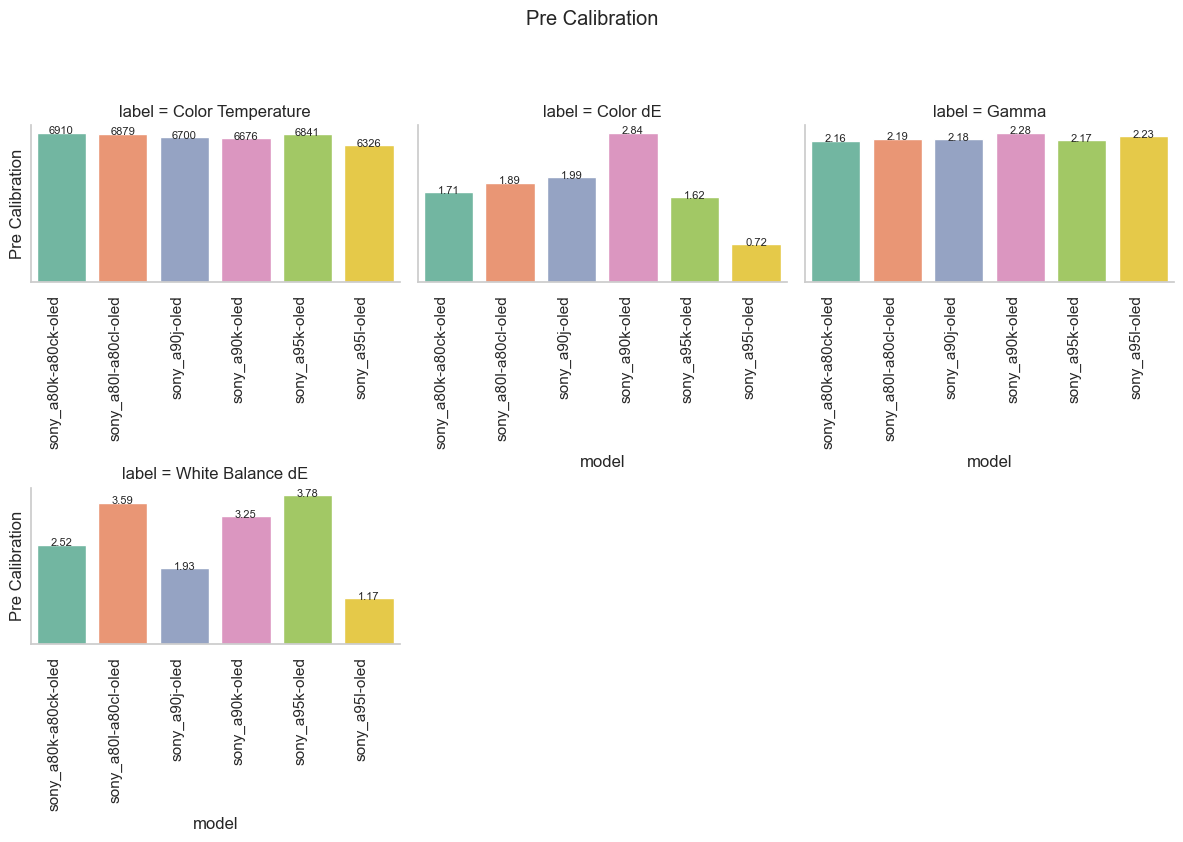

In [20]:
target_col = "Pre Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### Post Calibration

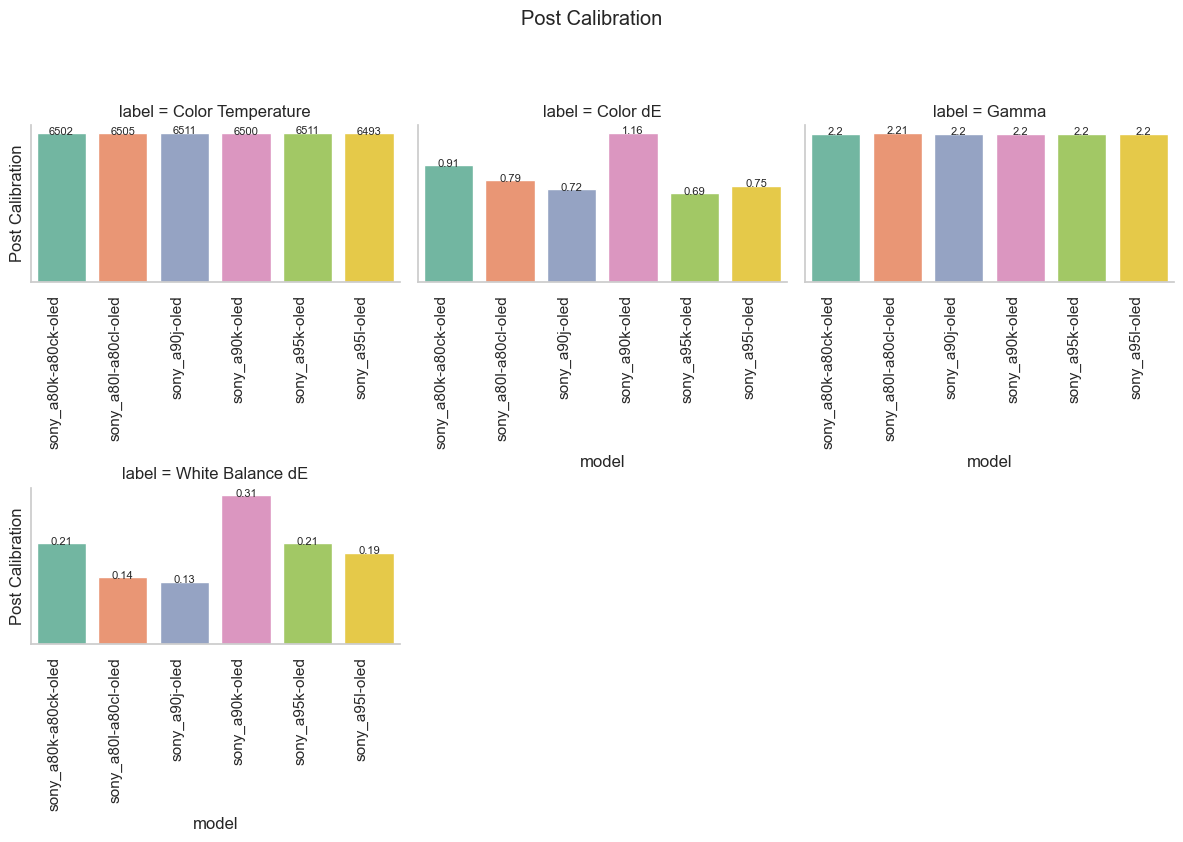

In [21]:
target_col = "Post Calibration"
rvisualizer.plotsns_facet_bar(target_col)

### PQ EOTF Tracking

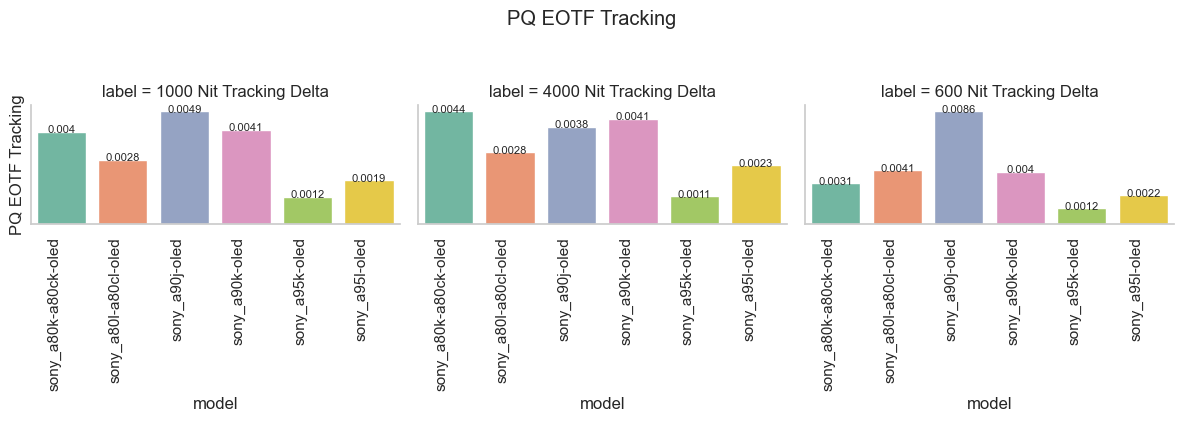

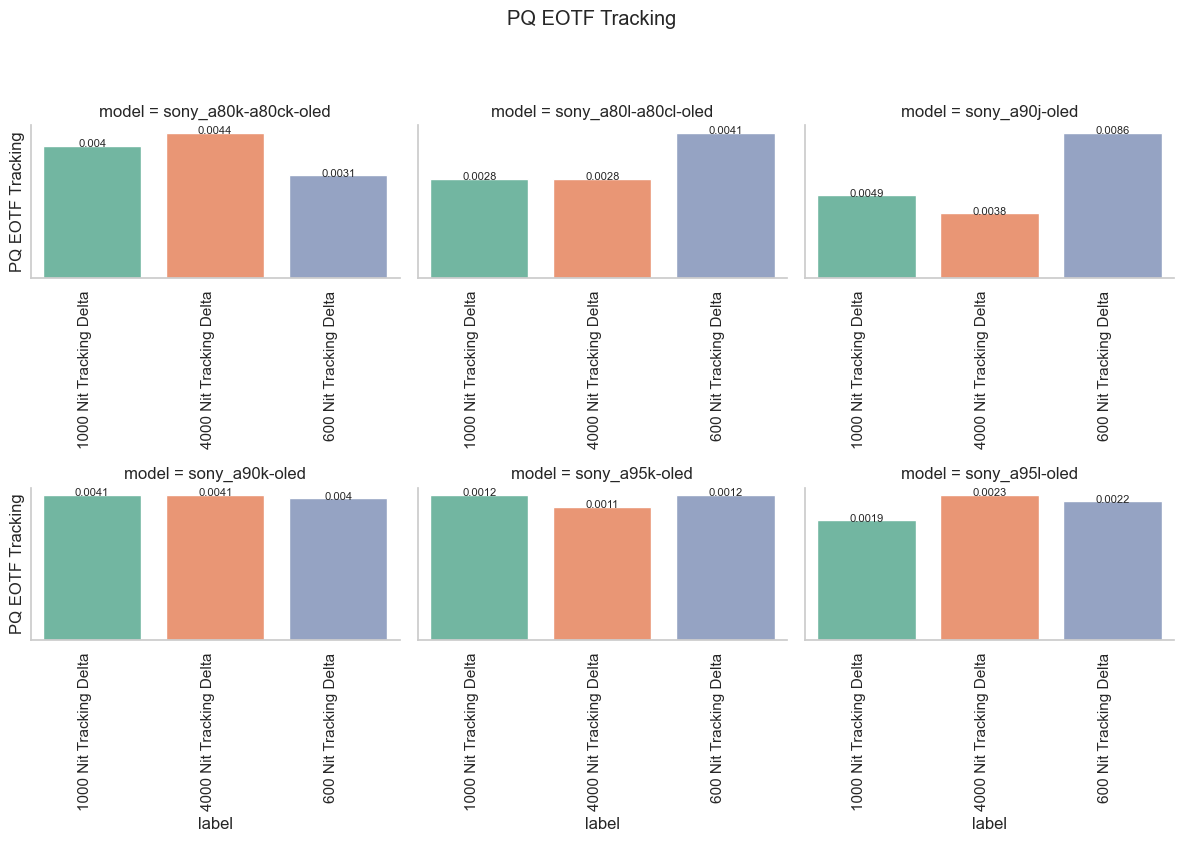

In [22]:
target_col = "PQ EOTF Tracking"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Reflections

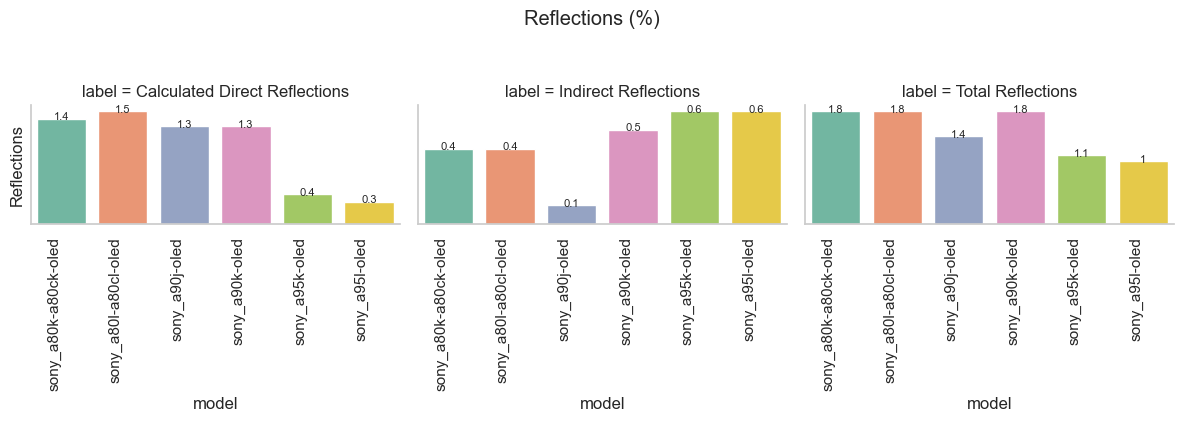

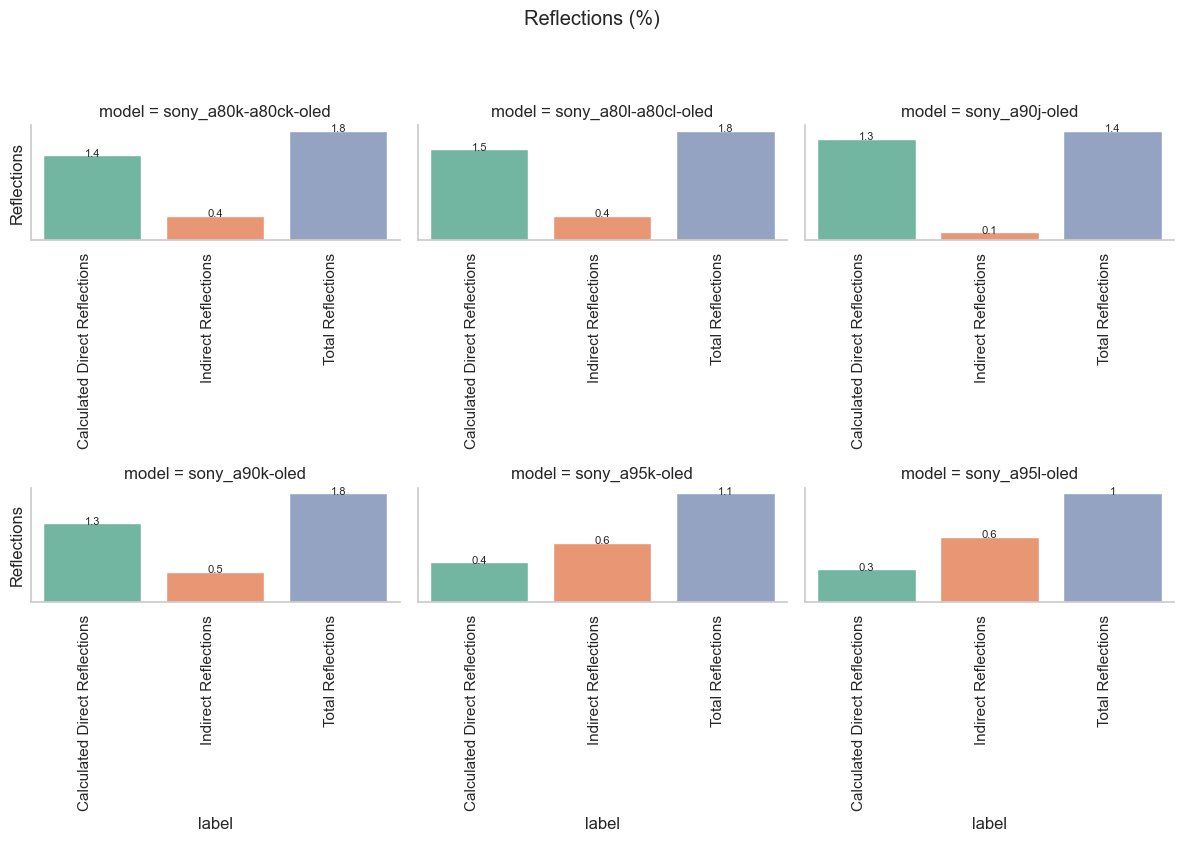

In [23]:
target_col = "Reflections"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### HDR Native Gradient

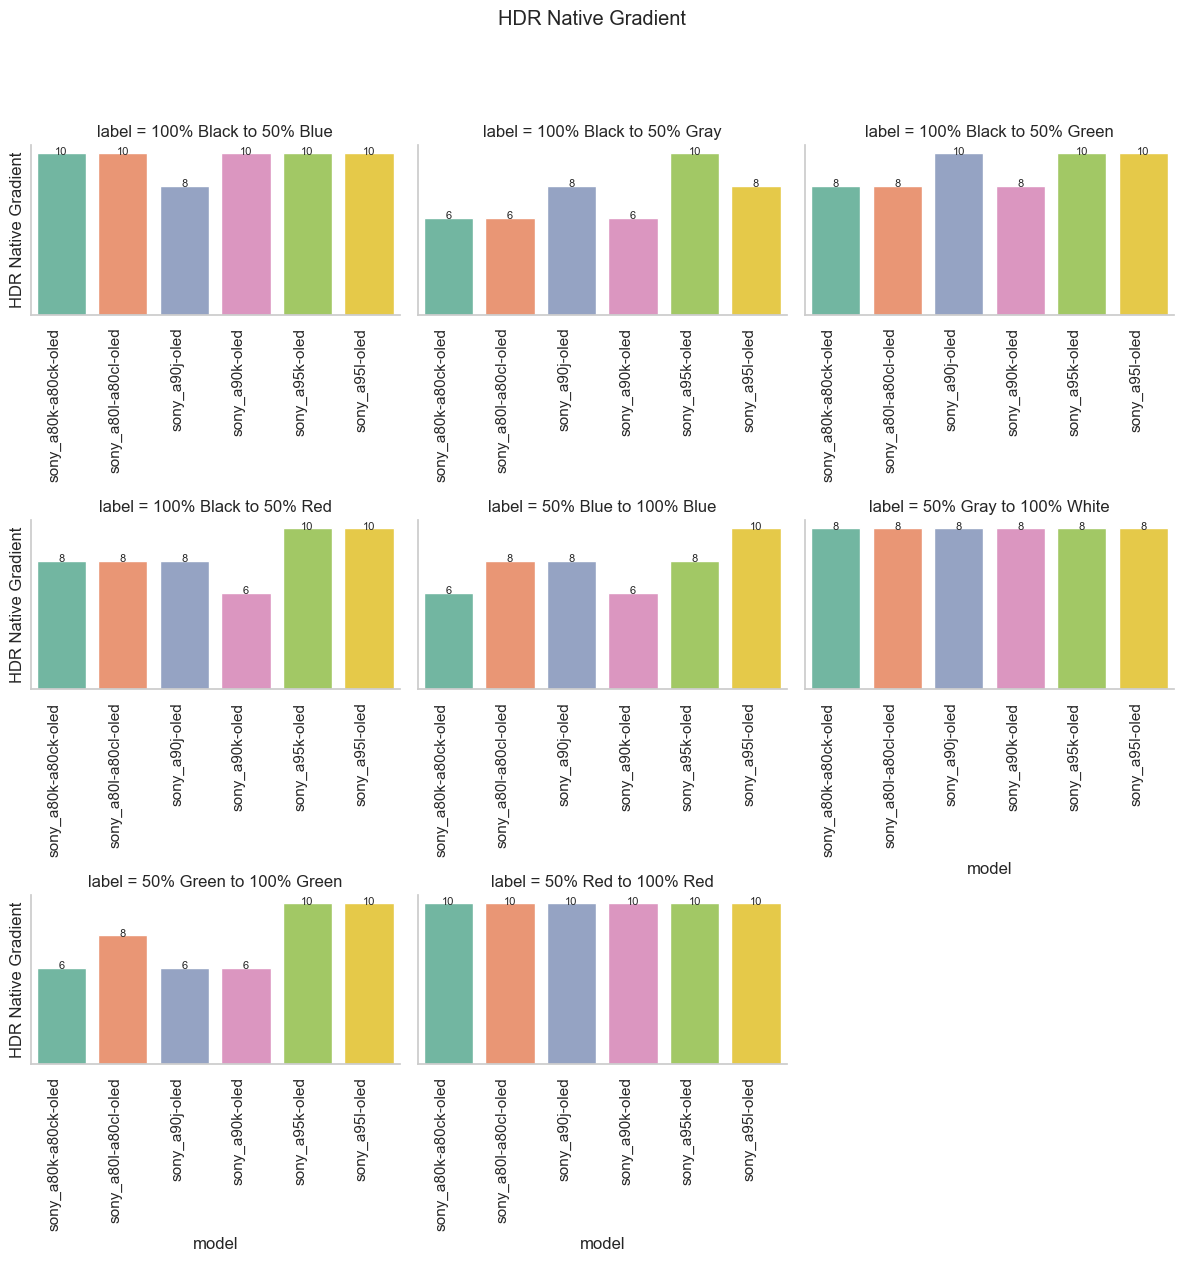

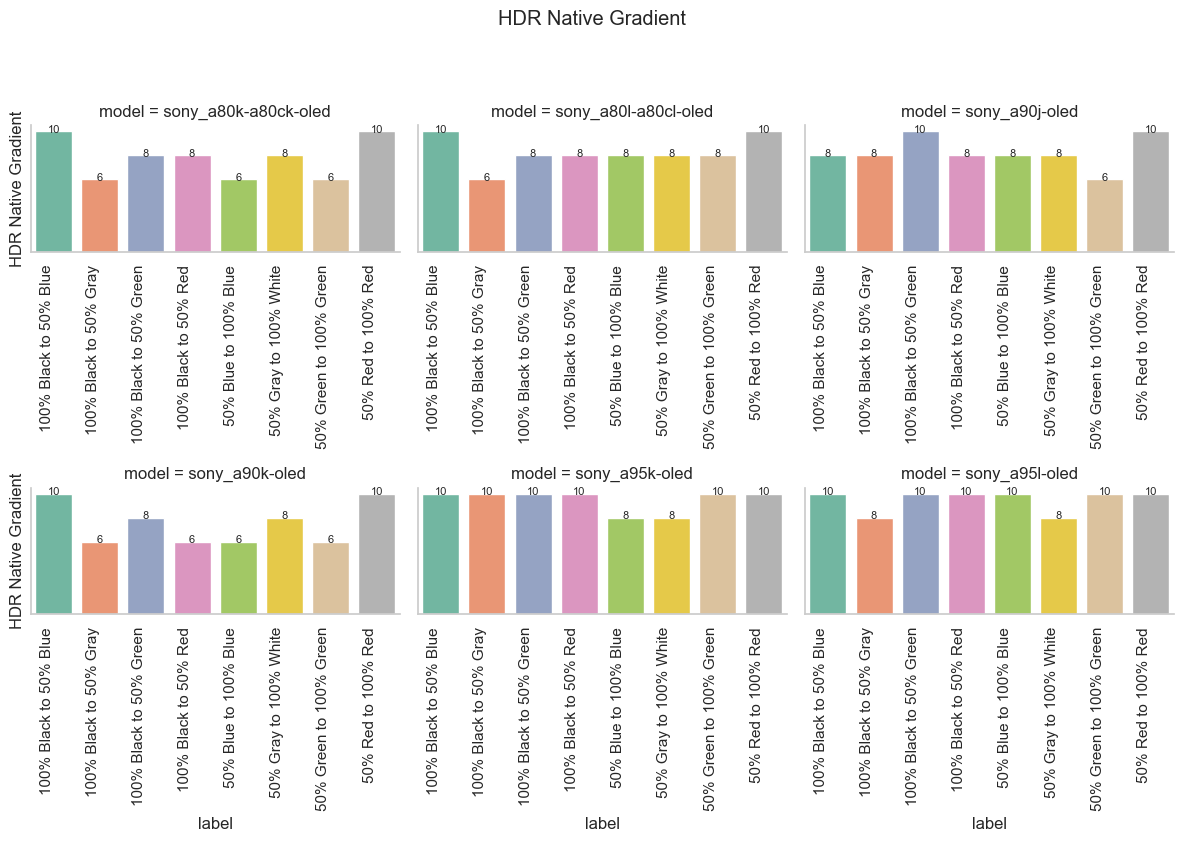

In [24]:
target_col = "HDR Native Gradient"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Low-Quality Content Smoothing

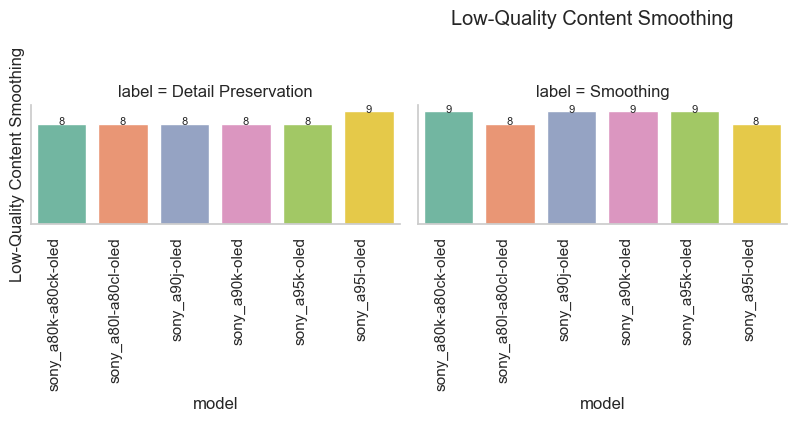

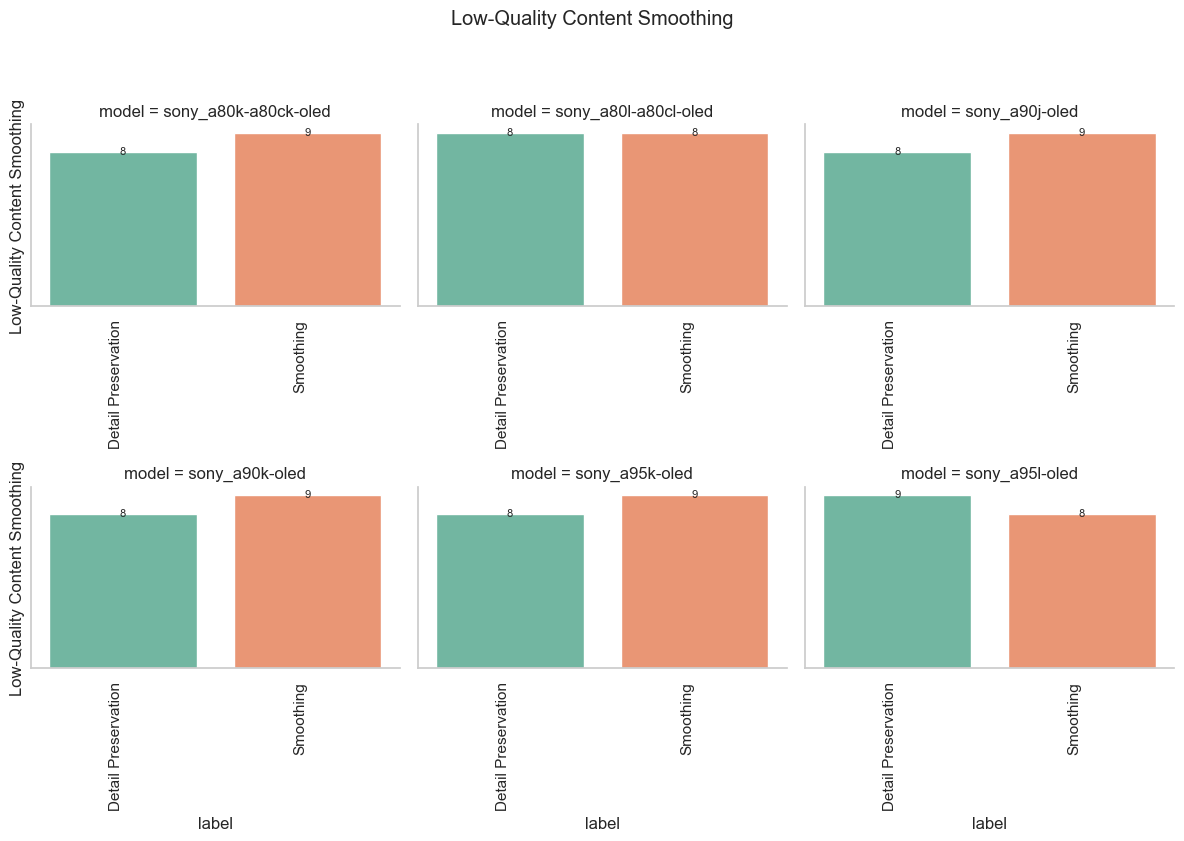

In [25]:
target_col = "Low-Quality Content Smoothing"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Gray Uniformity

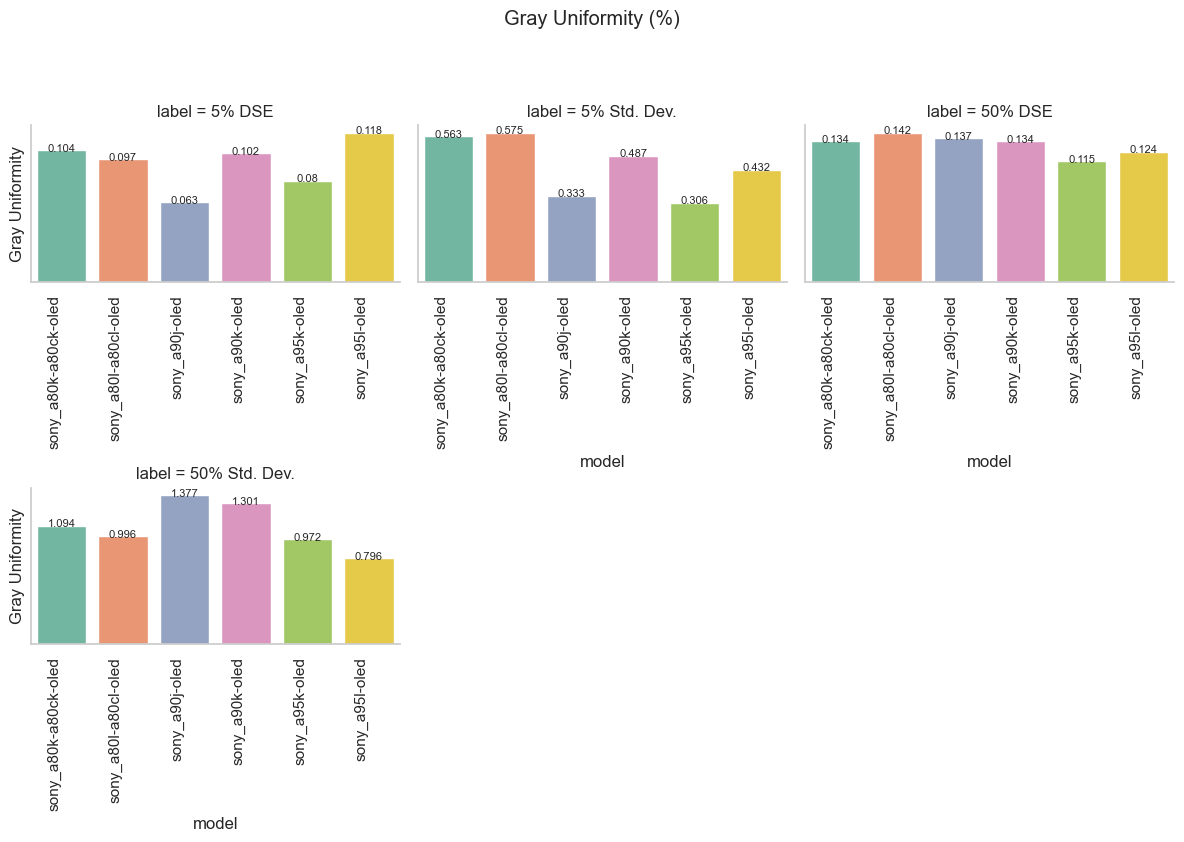

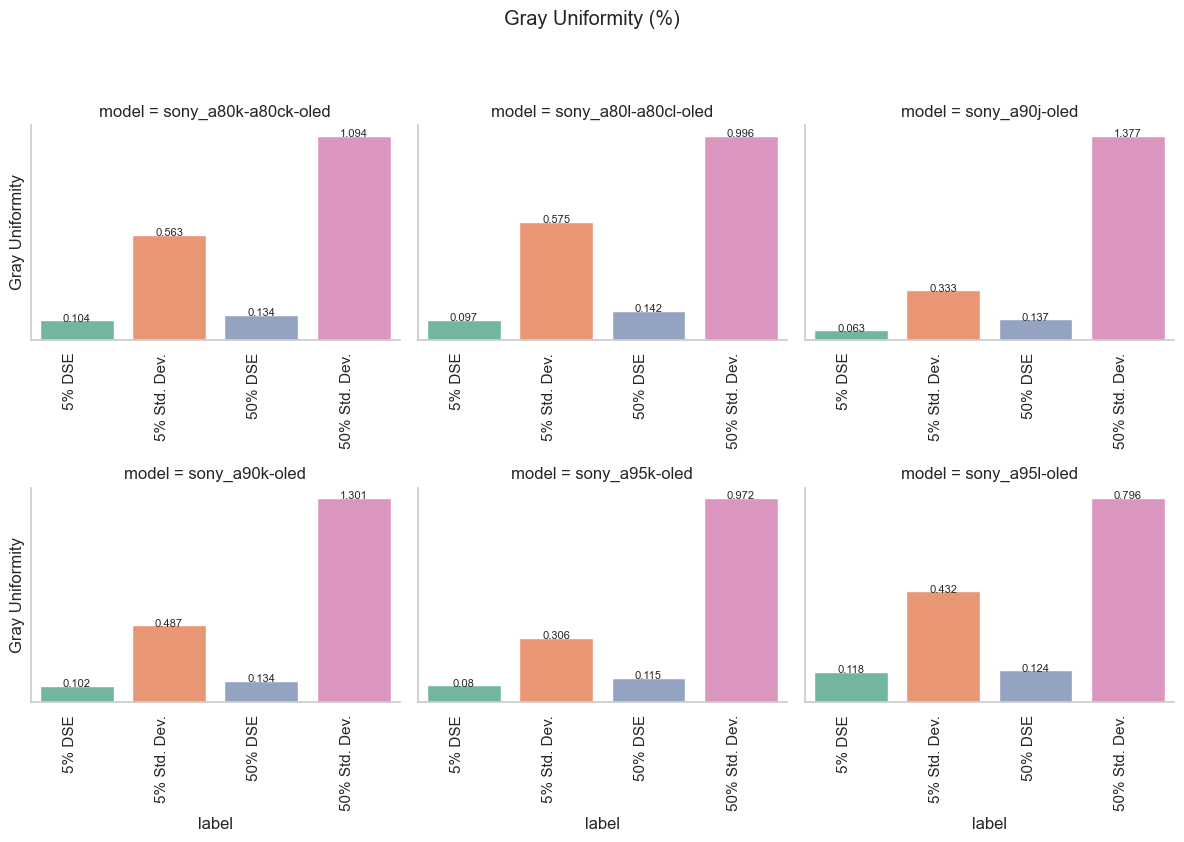

In [26]:
target_col = "Gray Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Black Uniformity

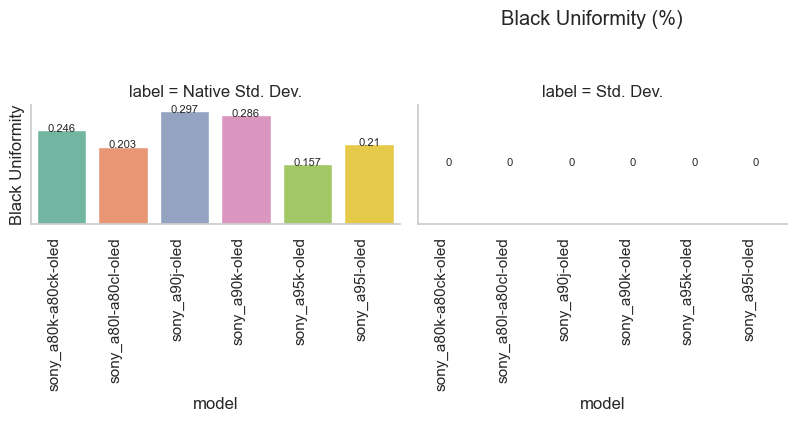

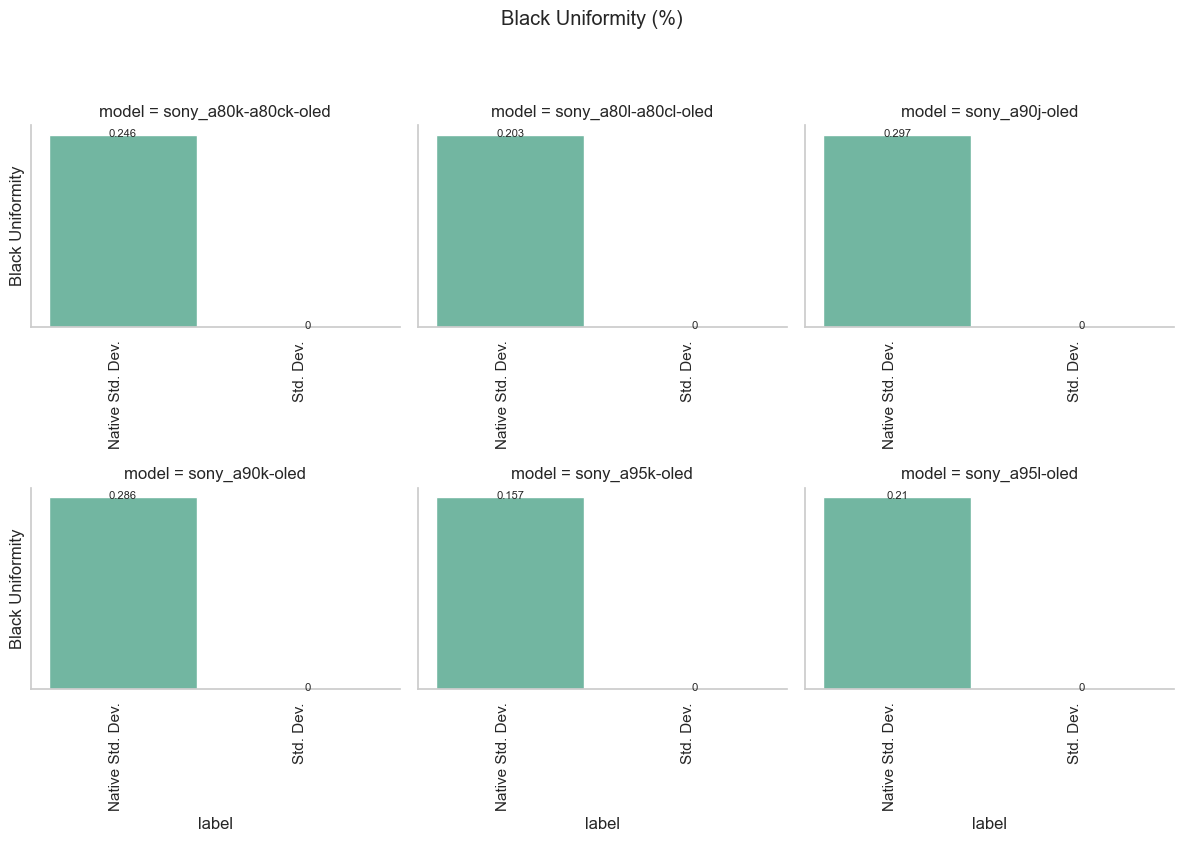

In [27]:
target_col = "Black Uniformity"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Response Time

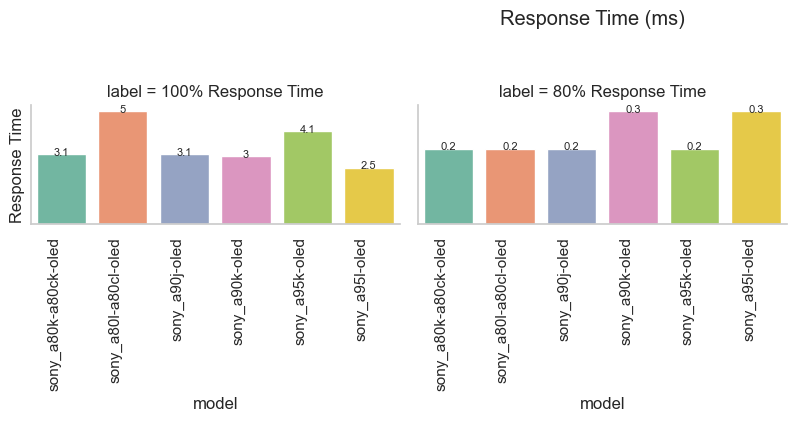

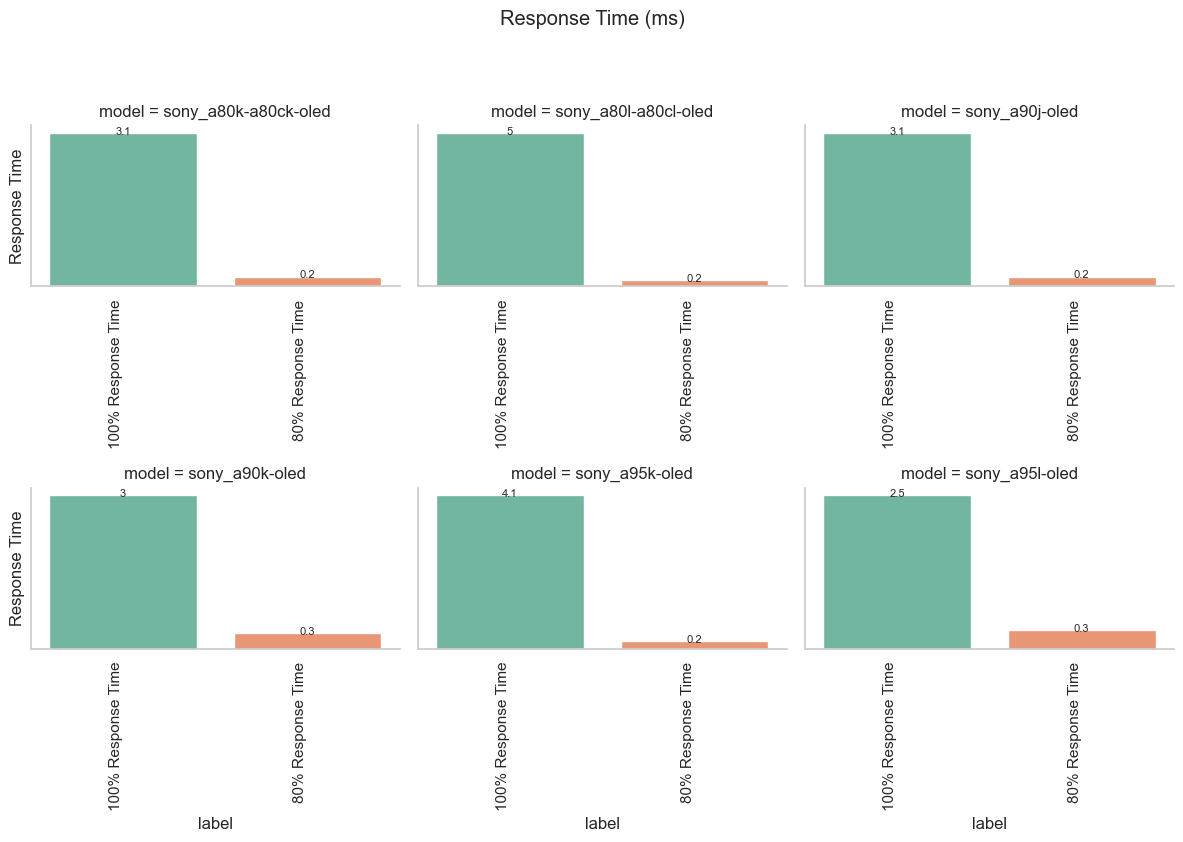

In [28]:
target_col = "Response Time"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Stutter

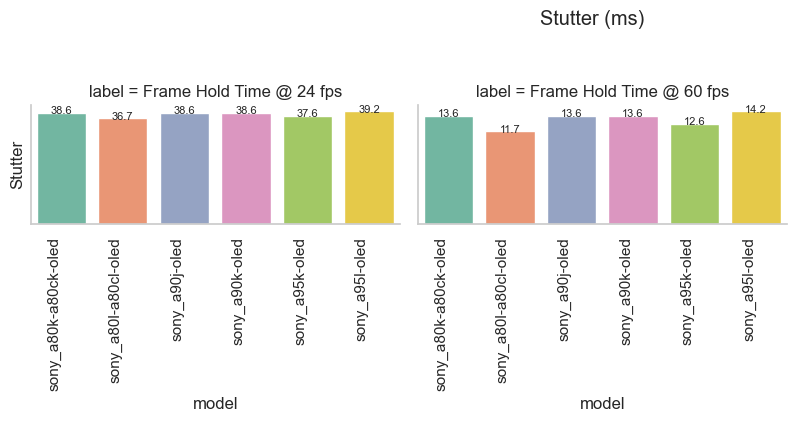

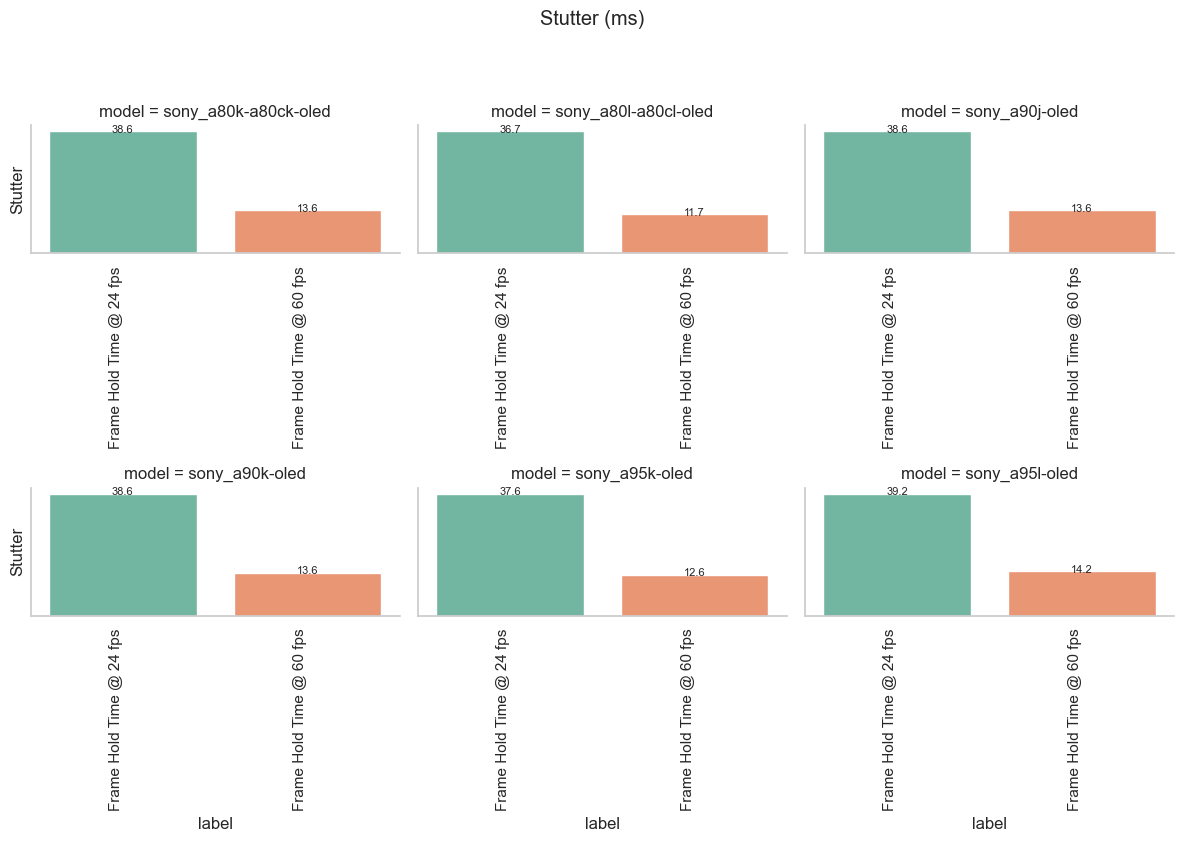

In [29]:
target_col = "Stutter"
rvisualizer.plotsns_facet_bar(target_col)
rvisualizer.plotsns_facet_bar(target_col, swap_mode=True)

### Lighting Zone Transitions

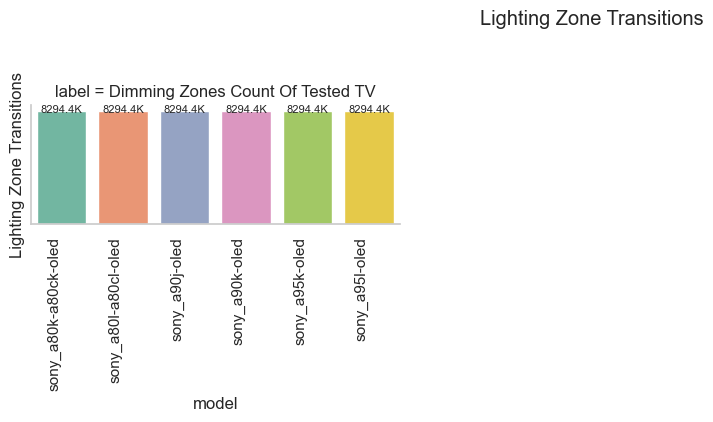

In [30]:
target_col = 'Lighting Zone Transitions'
rvisualizer.plotsns_facet_bar(target_col)

### Flicker-Free

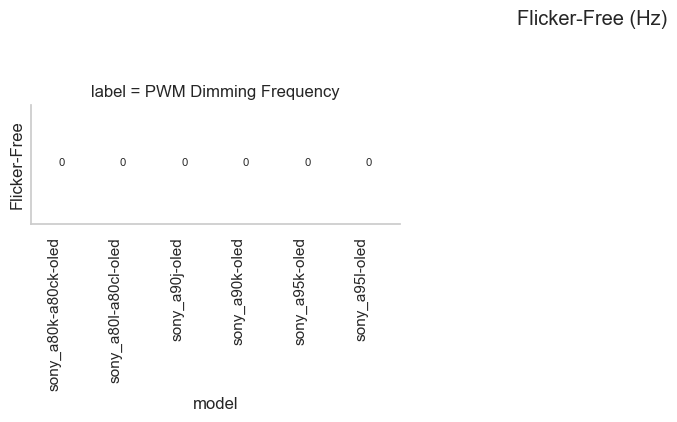

In [31]:
target_col = "Flicker-Free"
rvisualizer.plotsns_facet_bar(target_col)

### Variable Refresh Rate

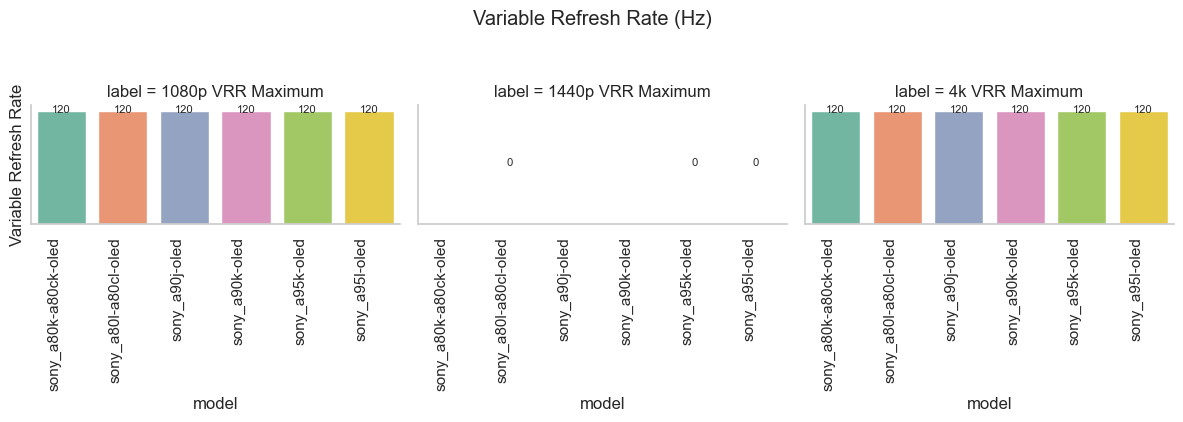

In [32]:
target_col = "Variable Refresh Rate"
rvisualizer.plotsns_facet_bar(target_col)

# colab에서 파일 받기

In [34]:
from google.colab import files
!zip -r /content/results_rtings.zip /content/results/
files.download('/content/results_rtings.zip')

---

---